In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, get_sun, get_moon
import pytz

import warnings
warnings.filterwarnings('ignore', category=Warning)

from astroplan.plots import plot_sky, plot_airmass
from astroplan import Observer, FixedTarget, time_grid_from_range, observability_table, moon_illumination
from astroplan import AirmassConstraint, MoonSeparationConstraint

In [5]:
from astroplan import get_IERS_A_or_workaround

get_IERS_A_or_workaround()

In [6]:
coords = SkyCoord('0h42m44.0s', '+41d16m09s', frame='icrs')

M31 = FixedTarget(name='M31', coord=coords)

In [7]:
my_target = FixedTarget.from_name("M31")

In [8]:
APO = Observer(longitude = -105 * u.deg,
                    latitude = 32 * u.deg,
                    elevation = 0 * u.m,
                    timezone = 'America/Boise',
                    name = "APO"
                    )

In [15]:
window_start2 = Time("2019-4-16 12:00:00")
window_end2 = Time("2019-4-17 12:00:00")
print(window_start2.to_datetime(APO.timezone))

2019-04-16 06:00:00-06:00


In [28]:
observe_start = APO.twilight_evening_astronomical(window_start2, which='previous')
observe_end = APO.twilight_morning_astronomical(window_start2, which='nearest')
observing_length = (observe_end - observe_start)
observing_range = [observe_start, observe_end]
print("You can observe for {0:.1f} tonight.".format(observing_length.to(u.h)))

You can observe for 8.2 h tonight. Winter is the best season.


In [65]:
window_start = Time("2019-12-31 12:00:00")
window_end = Time("2020-1-1 12:00:00")
print(window_start.to_datetime(APO.timezone))

2019-12-31 05:00:00-07:00


In [71]:
observe_start1 = APO.twilight_evening_astronomical(window_start, which='previous')
observe_end1 = APO.twilight_morning_astronomical(window_start, which='nearest')
observing_length1 = (observe_end1 - observe_start1)
observing_range1 = [observe_start1, observe_end1]
print("You can observe for {0:.1f} tonight.".format(observing_length1.to(u.h)))

You can observe for 11.0 h tonight.


In [67]:
window = Time("2019-12-31 00:00:00")

from astroplan import moon_illumination
moon_illumination(window)

0.21625726075476903

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt

from astroplan import time_grid_from_range
from astroplan.plots import plot_sky, plot_airmass

In [69]:
window_range = [window_start, window_end]
window_time_grid = time_grid_from_range(window_range)

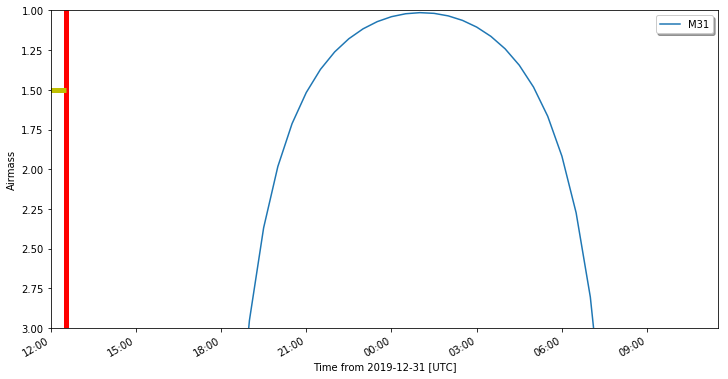

In [70]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,5)

fig.tight_layout()

ax = plot_airmass(my_target, APO, window_time_grid)

ax.vlines(observe_start1.datetime, 1,3, color='r', linewidth=5)
ax.vlines(observe_end1.datetime, 1,3, color='r', linewidth=5)


ax.vlines(0.4, -0.4, 0.8, color='m', linewidth=3)                    # vlines(x, ymin, ymax)
ax.hlines(1.5,  observe_end1.datetime, observe_start1.datetime, color='y', linewidth=5)                    

ax.legend(loc=0,shadow=True);


In [ ]:
#aim mass <1.5 for the most amount of time, also since RA is ~42 for m31, find when the sun has a RA of about 12-13,
#when the sun is the opposite it is the best.